In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# LSFF: generate DALYs attributable to risk factors maps

In [2]:
import geopandas as gpd, matplotlib as mpl, matplotlib.backends.backend_pdf

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.name = world.name.astype(str)

world.loc[world.name=="Dem. Rep. Congo",'name'] = 'Democratic Republic of the Congo'
world.loc[world.name=="Tanzania",'name'] = 'United Republic of Tanzania'
world.rename(columns = {'name':'location_name'}, inplace=True)

In [3]:
def adjust_loc_names(df):    
    df = df[df.location_name!='Global']
    location_name_map = {    
        'Angola': 'Angola',
        'Bangladesh': 'Bangladesh',
        'Burkina Faso': 'Burkina Faso',
        "Côte d'Ivoire": "Côte d'Ivoire",
        'Cameroon': 'Cameroon',
        'China': 'China',
        'Democratic Republic of the Congo': 'Democratic Republic of the Congo',
        'Egypt': 'Egypt',
        'Ethiopia': 'Ethiopia',
        'Ghana': 'Ghana',
        'India': 'India',
        'Indonesia': 'Indonesia',
        'Kenya': 'Kenya',
        'Madagascar': 'Madagascar',
        'Mozambique': 'Mozambique',
        'Nepal': 'Nepal',
        'Nigeria': 'Nigeria',
        'Pakistan': 'Pakistan',
        'South Africa': 'South Africa',
        'Sudan': 'Sudan',
        'Uganda': 'Uganda',
        'United Republic of Tanzania': 'United Republic of Tanzania',
        'Viet Nam': 'Vietnam',
        'Myanmar': 'Myanmar',
        'Niger': 'Niger'
    }

    df.location_name = df.location_name.map(location_name_map)
    return df

In [4]:
def pull_vad():
    vad_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/inputs/vitamin_a_data_summary.csv'
    vad = pd.read_csv(vad_path)
    vad = adjust_loc_names(vad)

    rename_vad = {
        "('dalys_attributable_to_vad_among_children_under_5', 'mean')":'mean_vad_dalys_u5',
        "('dalys_attributable_to_vad_per_100000_py_among_children_under_5', 'mean')":"mean_vad_dalys_per_100k_py_u5"
    }

    return vad.rename(columns=rename_vad)

In [5]:
def pull_zinc():
    zinc_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/inputs/zinc_data_summary.csv'
    zinc = pd.read_csv(zinc_path)

    rename_zinc = {
        "dalys_attributable_to_zinc_deficiency_in_age_group_1_to_4":'mean_zinc_dalys_1_4',
        "dalys_attributable_to_zinc_deficiency_per_100000_py_in_age_group_1_to_4":"mean_zinc_dalys_per_100k_py_u5",
        "measure":"location_id",
        "Unnamed: 1":"location_name"
    }
    zinc = zinc.rename(columns=rename_zinc).iloc[2:]

    zinc.mean_zinc_dalys_1_4 = zinc.mean_zinc_dalys_1_4.astype(float)
    zinc.mean_zinc_dalys_per_100k_py_u5 = zinc.mean_zinc_dalys_per_100k_py_u5.astype(float)
    
    zinc = adjust_loc_names(zinc)
    return zinc

In [105]:
# df = pull_zinc()

# df = pull_vad()

# assert(len(df[df.location_name.isna()])==0)

# assert len([i for i in df.location_name.unique() if i not in world.location_name.unique()])==0

# shapefiles = world.merge(df, on = 'location_name', how = 'right')

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
# def plot_map(risk, var_name, n_colors = 6):
#     fig, ax = plt.subplots(figsize=(30,10))

#     ax.set_aspect('equal')
#     ax.set_title(f'DALYs attributable to {risk} among children under 5', fontsize = 24)
    
#     ax.set_axis_off()
    
#     # plot country outlines
#     base = world[world.continent.isin(['Africa','Asia'])].plot(ax=ax, color='white', edgecolor='gray')

#     # rf_df = shapefiles[shapefiles.Risk==risk_factor]
#     scale_max = shapefiles[var_name].max()
#     scale_min = shapefiles[var_name].min()

#     # color in countries for which we have counts
#     cmap = plt.cm.get_cmap('RdYlBu_r', n_colors) #colorscale, discretized to n_colors bins
#     norm = mpl.colors.Normalize(vmin=scale_min, vmax=scale_max) #normalize color scale
#     # norm = mpl.colors.LogNorm(vmin=0, vmax=scale_max),
#     me = shapefiles.plot(ax=base,
#                          column=var_name,
#                          cmap=cmap,
#                          norm = norm, 
#                          legend=True,
#                          legend_kwds = {'ticks':np.arange(scale_min,scale_max+(scale_max/n_colors),(scale_max-scale_min)/n_colors)},
#                          edgecolor = 'gray')
#     return fig

In [16]:
def plot_map(shapefiles, risk, var_name, step = 200, n_colors = 5):
    fig, ax = plt.subplots(figsize=(30,10))

    ax.set_aspect('equal')
    ax.set_title(f'DALYs attributable to {risk} among children under 5', fontsize = 24)
    
    ax.set_axis_off()
    
    # plot country outlines
    base = world[world.continent.isin(['Africa','Asia'])].plot(ax=ax, color='white', edgecolor='gray')

#     rf_df = shapefiles[shapefiles.Risk==risk_factor]
#     step = 50_000
    scale_max = step * n_colors

    # color in countries for which we have counts
    cmap = plt.cm.get_cmap('RdYlBu_r', n_colors) #colorscale, discretized to n_colors bins
    norm = mpl.colors.Normalize(vmin=0, vmax=scale_max) #normalize color scale
    # norm = mpl.colors.LogNorm(vmin=0, vmax=scale_max),
    me = shapefiles.plot(ax=base,
                         column=var_name,
                         cmap=cmap,
                         norm = norm, 
                         legend=True,
                         legend_kwds = {'ticks':np.arange(0,scale_max+1,step)},
                         edgecolor = 'gray')
#                          legend_kwds = {'ticks':np.arange(0,scale_max+(scale_max/n_colors),(scale_max)/n_colors)},

    return fig

In [13]:
# shapefiles = world.merge(df, on = 'location_name', how = 'right')

In [17]:
def output_map(df, save_path, risk, var_name, step, n_colors):
    
    assert(len(df[df.location_name.isna()])==0)
    assert len([i for i in df.location_name.unique() if i not in world.location_name.unique()])==0
    
    shapefiles = world.merge(df, on = 'location_name', how = 'right')
    pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)

    fig = plot_map(shapefiles = shapefiles, risk = risk, var_name = var_name, step = step, n_colors = n_colors)
    pdf.savefig(fig)

    pdf.close()

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


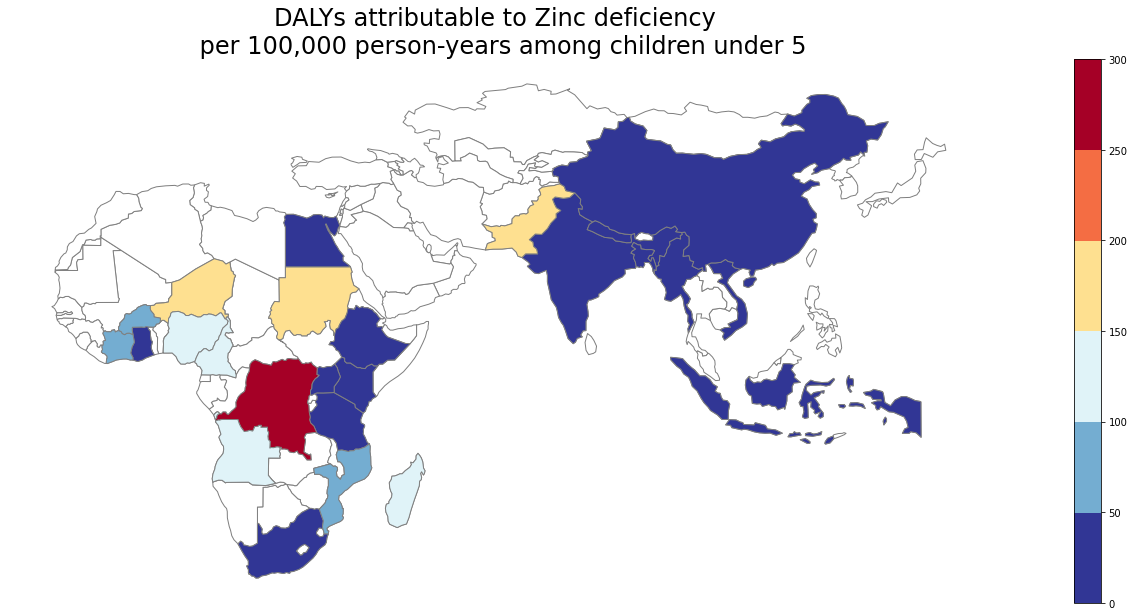

In [23]:
df = pull_zinc()
save_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/1_4_zinc_dalys_per_100k_py_map.pdf'
risk = 'Zinc deficiency \n per 100,000 person-years'
var_name = 'mean_zinc_dalys_per_100k_py_u5'
step = 50
n_colors = 6 

output_map(df, save_path, risk, var_name, step, n_colors)

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


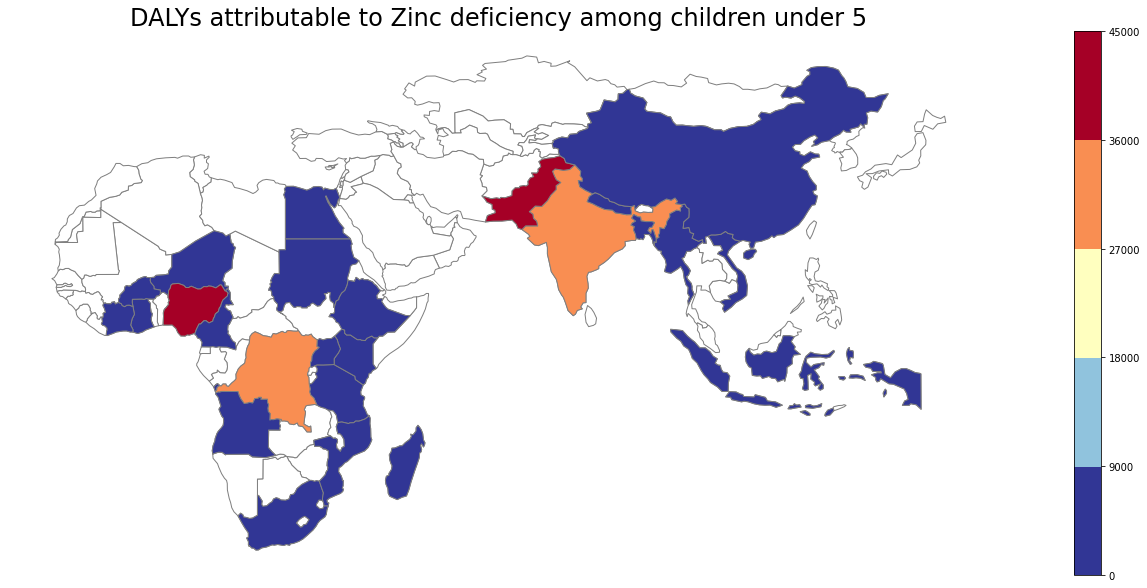

In [22]:
df = pull_zinc()
save_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/1_4_zinc_dalys_map.pdf'
risk = 'Zinc deficiency'
var_name = 'mean_zinc_dalys_1_4'
step = 9_000
n_colors = 5 

output_map(df, save_path, risk, var_name, step, n_colors)

In [129]:
df.mean_vad_dalys_per_100k_py_u5.max()

6942.135518373921

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


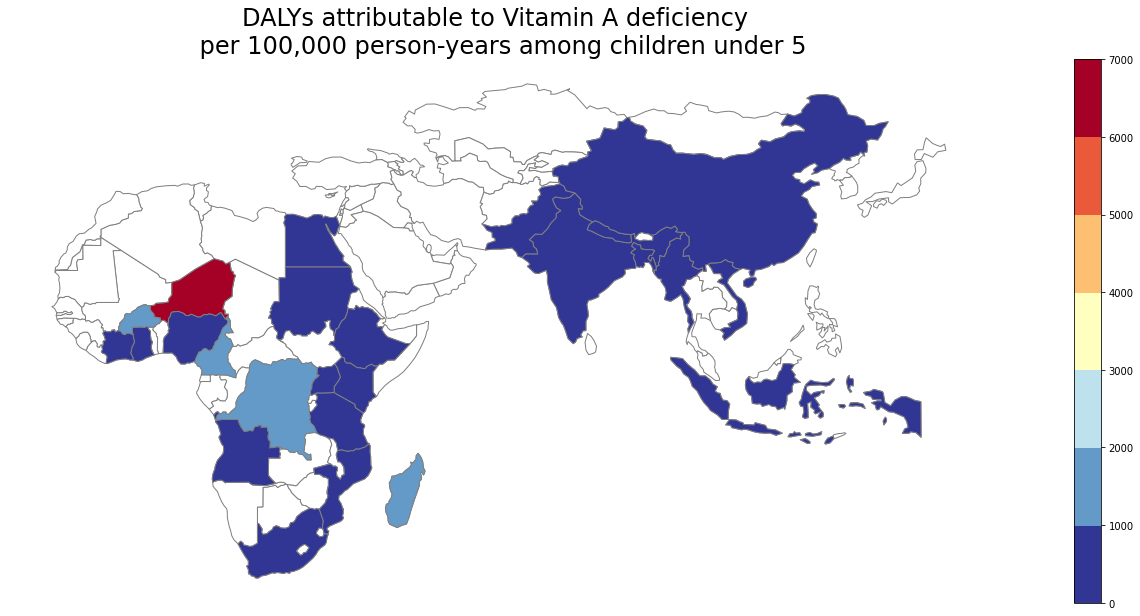

In [20]:
df = pull_vad()
save_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/u5_vad_dalys_per_100k_py_map.pdf'
risk = 'Vitamin A deficiency \n per 100,000 person-years'
var_name = 'mean_vad_dalys_per_100k_py_u5'
step = 1_000
n_colors = 7

output_map(df, save_path, risk, var_name, step, n_colors)

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


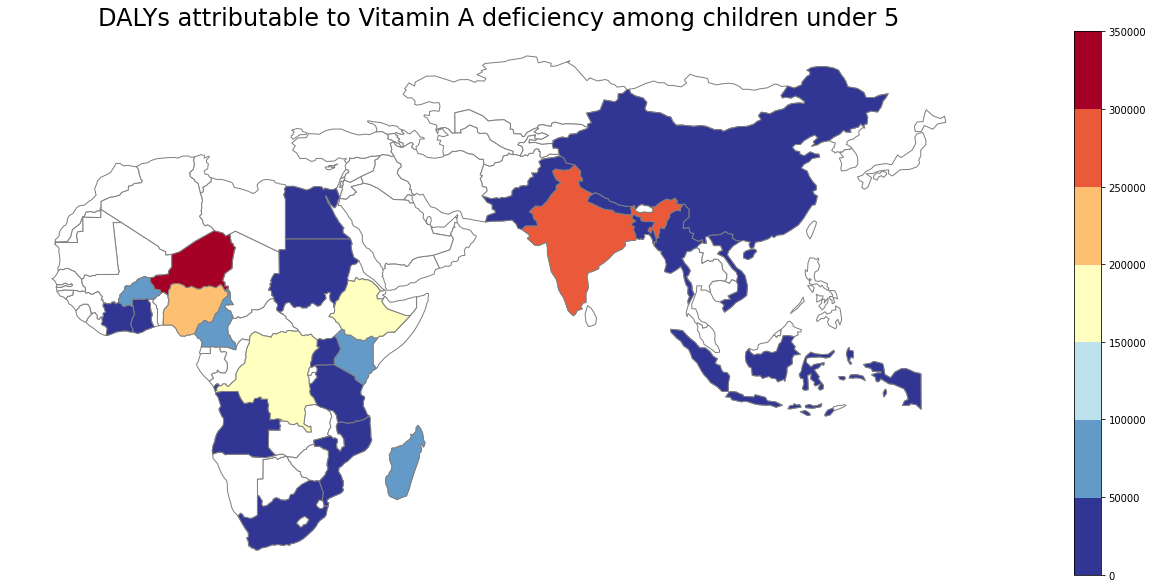

In [21]:
df = pull_vad()
save_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/u5_vad_dalys_map.pdf'
risk = 'Vitamin A deficiency'
var_name = 'mean_vad_dalys_u5'
step = 50_000
n_colors = 7

output_map(df, save_path, risk, var_name, step, n_colors)

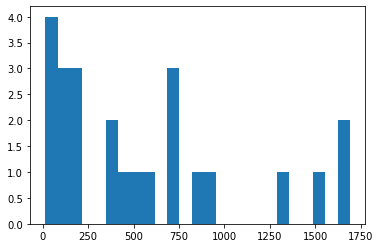

In [80]:
plt.hist(shapefiles[shapefiles.location_name!="Niger"].mean_vad_dalys_per_100k_py_u5, bins = 25)
plt.show()